In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stocks/india-news-headlines.csv
/kaggle/input/stock-market-dataset/symbols_valid_meta.csv
/kaggle/input/stock-market-dataset/stocks/MTL.csv
/kaggle/input/stock-market-dataset/stocks/JOE.csv
/kaggle/input/stock-market-dataset/stocks/DRE.csv
/kaggle/input/stock-market-dataset/stocks/CTY.csv
/kaggle/input/stock-market-dataset/stocks/AMSF.csv
/kaggle/input/stock-market-dataset/stocks/IMH.csv
/kaggle/input/stock-market-dataset/stocks/GFL.csv
/kaggle/input/stock-market-dataset/stocks/CLM.csv
/kaggle/input/stock-market-dataset/stocks/UBER.csv
/kaggle/input/stock-market-dataset/stocks/NEBU.csv
/kaggle/input/stock-market-dataset/stocks/SGB.csv
/kaggle/input/stock-market-dataset/stocks/WWW.csv
/kaggle/input/stock-market-dataset/stocks/UTSI.csv
/kaggle/input/stock-market-dataset/stocks/PBB.csv
/kaggle/input/stock-market-dataset/stocks/UFCS.csv
/kaggle/input/stock-market-dataset/stocks/ZM.csv
/kaggle/input/stock-market-dataset/stocks/DCPH.csv
/kaggle/input/stock-market-dataset/stocks

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost 
import lightgbm 
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
# Read  textual data

train_data = pd.read_csv("/kaggle/input/stocks/india-news-headlines.csv")

In [5]:
#view first 5 rows train data
train_data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [6]:
# check number of rows and columns of train data
train_data.shape

(3650970, 3)

In [7]:
# to get infomation about the  train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


# preprocessing

In [8]:
# checking missing values
train_data.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [9]:
## Check for Duplicates and Remove 
train_data.duplicated().sum() 
train_data.drop_duplicates(inplace = True)  

In [10]:
## function to preprocess the data
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [11]:
# Create list of words in discription column
train_data["headline_text_cleaning"] =  train_data["headline_text"].apply(preprocessing)

In [12]:
train_data.head()

,publish_date,headline_category,headline_text,headline_text_cleaning
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo disturbed ayodhya says vajpayee
1,20010102,unknown,Fissures in Hurriyat over Pak visit,fissures hurriyat pak visit
2,20010102,unknown,America's unwanted heading for India?,americas unwanted heading india
3,20010102,unknown,For bigwigs; it is destination Goa,bigwigs destination goa
4,20010102,unknown,Extra buses to clear tourist traffic,extra buses clear tourist traffic


In [13]:
train_data= train_data[(train_data['headline_category'] != 'unknown') & (train_data['headline_category'] != 'removed')].reset_index()

# Data Visualization

In [14]:
train_data.drop('headline_category', axis = 1, inplace=True)
train_data.head()

,index,publish_date,headline_text,headline_text_cleaning
0,85,20010102,Raju Chacha,raju chacha
1,126,20010103,'Devdas': Jinxed?,devdas jinxed
2,272,20010104,Dudhwa tiger died of starvation; not poisoning,dudhwa tiger died starvation poisoning
3,273,20010104,Three in race for chief secy's post,three race chief secys post
4,274,20010104,Druggists' stir leads to shortage of medicines,druggists stir leads shortage medicines


In [15]:
def Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def Polarity(text):
    return  TextBlob(text).sentiment.polarity

train_data['Subjectivity'] = train_data['headline_text'].apply(Subjectivity)
train_data['Polarity'] = train_data['headline_text'].apply(Polarity)
train_data

,index,publish_date,headline_text,headline_text_cleaning,Subjectivity,Polarity
0,85,20010102,Raju Chacha,raju chacha,0.000000,0.000000
1,126,20010103,'Devdas': Jinxed?,devdas jinxed,0.000000,0.000000
2,272,20010104,Dudhwa tiger died of starvation; not poisoning,dudhwa tiger died starvation poisoning,0.000000,0.000000
3,273,20010104,Three in race for chief secy's post,three race chief secys post,0.000000,0.000000
4,274,20010104,Druggists' stir leads to shortage of medicines,druggists stir leads shortage medicines,0.000000,0.000000
...,...,...,...,...,...,...
3418674,3650965,20220331,J&K sacks 2 cops; 3 other employees over terro...,jk sacks 2 cops 3 employees terror links,0.375000,-0.125000
3418675,3650966,20220331,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,ranbir kapoor says rishi kapoor enjoyed alcoho...,0.550000,0.100000
3418676,3650967,20220331,As Covid-19 cases drop to nil in southern dist...,covid19 cases drop nil southern districts tami...,0.000000,0.000000
3418677,3650968,20220331,Tamil Nadu sees marginal rise of Covid cases w...,tamil nadu sees marginal rise covid cases 39 n...,0.454545,0.136364


<Axes: >

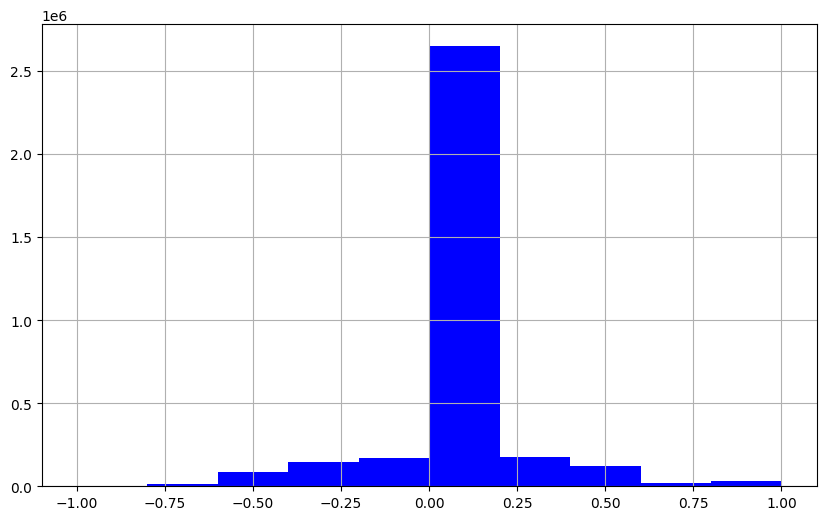

In [16]:
plt.figure(figsize = (10,6))
train_data['Polarity'].hist(color = 'blue')

<Axes: >

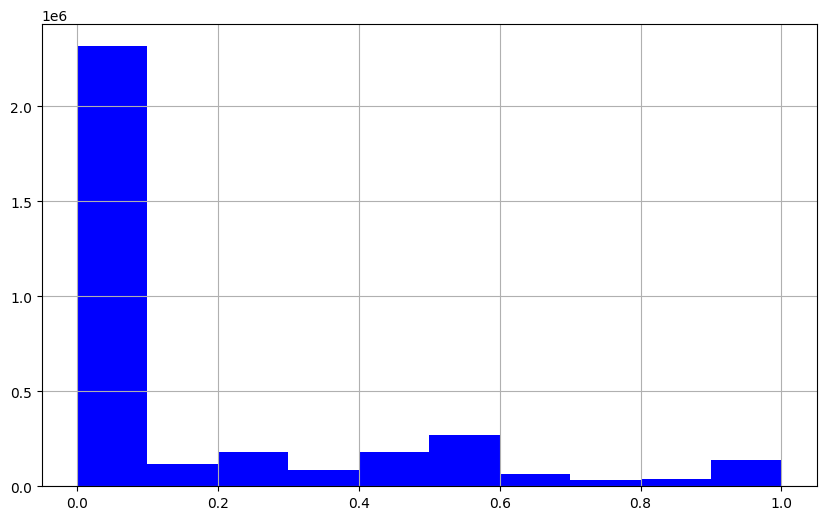

In [17]:
plt.figure(figsize = (10,6))
train_data['Subjectivity'].hist(color = 'blue')

In [18]:
snt = SentimentIntensityAnalyzer()

In [19]:
train_data['Compound'] = [snt.polarity_scores(v)['compound'] for v in train_data['headline_text']]
train_data['Negative'] = [snt.polarity_scores(v)['neg'] for v in train_data['headline_text']]
train_data['Neutral'] = [snt.polarity_scores(v)['neu'] for v in train_data['headline_text']]
train_data['Positive'] = [snt.polarity_scores(v)['pos'] for v in train_data['headline_text']]
train_data

,index,publish_date,headline_text,headline_text_cleaning,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,85,20010102,Raju Chacha,raju chacha,0.000000,0.000000,0.0000,0.000,1.000,0.000
1,126,20010103,'Devdas': Jinxed?,devdas jinxed,0.000000,0.000000,0.0000,0.000,1.000,0.000
2,272,20010104,Dudhwa tiger died of starvation; not poisoning,dudhwa tiger died starvation poisoning,0.000000,0.000000,-0.1351,0.308,0.428,0.263
3,273,20010104,Three in race for chief secy's post,three race chief secys post,0.000000,0.000000,0.0000,0.000,1.000,0.000
4,274,20010104,Druggists' stir leads to shortage of medicines,druggists stir leads shortage medicines,0.000000,0.000000,-0.2500,0.250,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...
3418674,3650965,20220331,J&K sacks 2 cops; 3 other employees over terro...,jk sacks 2 cops 3 employees terror links,0.375000,-0.125000,-0.5267,0.327,0.673,0.000
3418675,3650966,20220331,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,ranbir kapoor says rishi kapoor enjoyed alcoho...,0.550000,0.100000,0.5106,0.000,0.852,0.148
3418676,3650967,20220331,As Covid-19 cases drop to nil in southern dist...,covid19 cases drop nil southern districts tami...,0.000000,0.000000,-0.2732,0.123,0.877,0.000
3418677,3650968,20220331,Tamil Nadu sees marginal rise of Covid cases w...,tamil nadu sees marginal rise covid cases 39 n...,0.454545,0.136364,0.0000,0.000,1.000,0.000


In [20]:
# Read  numerical data
df_num = pd.read_csv("/kaggle/input/stock-market-dataset/stocks/ABM.csv")
df_num.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,0.950000,0.933333,0.933333,0.027191,18400
1,1980-03-18,0.000000,0.933333,0.908333,0.916667,0.026705,32800
2,1980-03-19,0.916667,0.916667,0.916667,0.916667,0.026705,0
3,1980-03-20,0.000000,0.933333,0.925000,0.933333,0.027191,29600
4,1980-03-21,0.000000,0.933333,0.933333,0.933333,0.027191,9600


In [21]:
# check number of rows and columns of train data
df_num.shape

(10098, 7)

In [22]:
# to get infomation about the  train data
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10098 non-null  object 
 1   Open       10098 non-null  float64
 2   High       10098 non-null  float64
 3   Low        10098 non-null  float64
 4   Close      10098 non-null  float64
 5   Adj Close  10098 non-null  float64
 6   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.4+ KB


# preprocessing

In [23]:
# checking missing values
df_num.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:
## Check for Duplicates and Remove 
df_num.duplicated().sum() 
df_num.drop_duplicates(inplace = True)  

# Data Visualization

Text(0, 0.5, 'ABM')

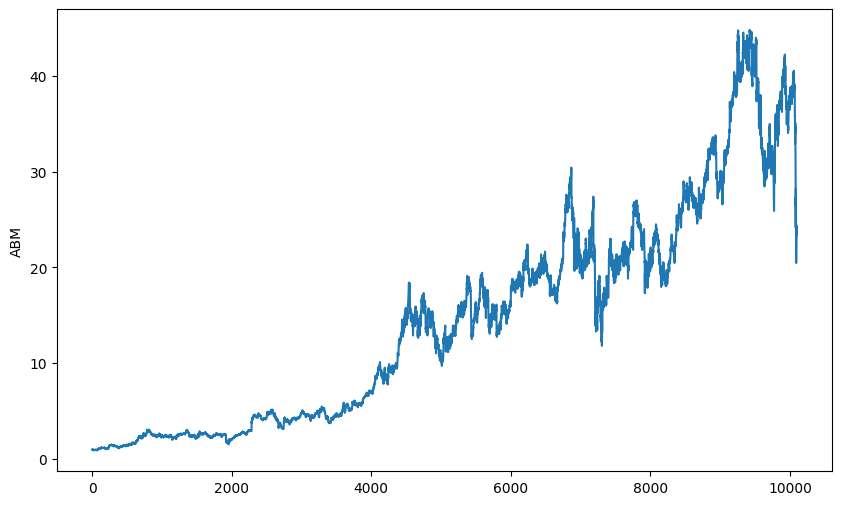

In [25]:
plt.figure(figsize=(10,6))
df_num['Close'].plot()
plt.ylabel('ABM')

Text(0, 0.5, 'ABM')

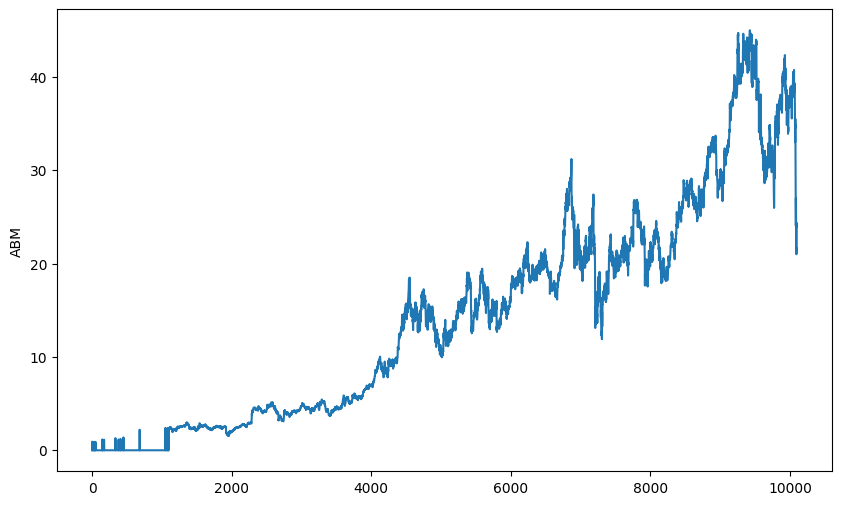

In [26]:
plt.figure(figsize=(10,6))
df_num['Open'].plot()
plt.ylabel('ABM')

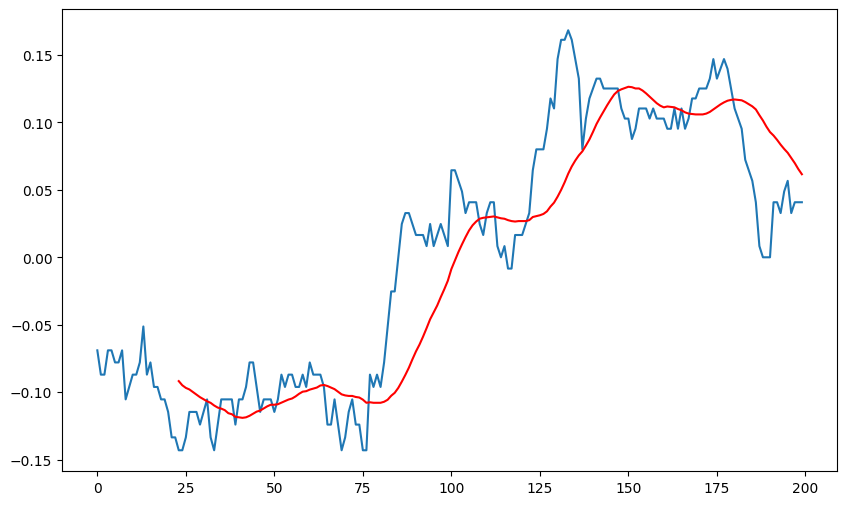

In [38]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red') 

In [76]:
#modify date format in 2 dataset
train_data["publish_date"] = pd.to_datetime(train_data["publish_date"],format='%Y%m%d')
df_num["Date"]= pd.to_datetime(df_num["Date"])

#removing unwanted characters from the News
train_data.replace("[^a-zA-Z']"," ",regex=True,inplace=True)

In [77]:
train_data.head(2)

,publish_date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Raju Chacha,0.0,0.0,0.0,0.0,1.0,0.0
1,2001-01-03,'Devdas' Jinxed,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
df_num.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,0.950000,0.933333,0.933333,0.027191,18400
1,1980-03-18,0.0,0.933333,0.908333,0.916667,0.026705,32800


In [81]:
train_data.rename(columns={'publish_date': 'Date'}, inplace=True)

In [83]:
df_merge = pd.merge(df_num, train_data, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,15.31250,15.343750,14.84375,15.093750,9.351575,171600,Raju Chacha,0.0,0.0,0.0000,0.000,1.000,0.000
1,2001-01-03,14.96875,15.468750,14.78125,15.468750,9.583911,124400,'Devdas' Jinxed,0.0,0.0,0.0000,0.000,1.000,0.000
2,2001-01-04,15.40625,15.500000,15.34375,15.500000,9.603271,83000,Dudhwa tiger died of starvation not poisoning,0.0,0.0,-0.1351,0.308,0.428,0.263
3,2001-01-04,15.40625,15.500000,15.34375,15.500000,9.603271,83000,Three in race for chief secy's post,0.0,0.0,0.0000,0.000,1.000,0.000
4,2001-01-04,15.40625,15.500000,15.34375,15.500000,9.603271,83000,Druggists' stir leads to shortage of medicines,0.0,0.0,-0.2500,0.250,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132255,2020-04-01,23.99000,24.120001,22.76000,23.360001,23.360001,530100,How many times can we revise the text,0.5,0.5,0.0000,0.000,1.000,0.000
2132256,2020-04-01,23.99000,24.120001,22.76000,23.360001,23.360001,530100,Sex workers run out of food essentials,0.0,0.0,0.0000,0.000,1.000,0.000
2132257,2020-04-01,23.99000,24.120001,22.76000,23.360001,23.360001,530100,they cant cook to save their lives,0.0,0.0,-0.3875,0.305,0.695,0.000
2132258,2020-04-01,23.99000,24.120001,22.76000,23.360001,23.360001,530100,While they cook to make a living,0.0,0.0,0.0000,0.000,1.000,0.000


In [63]:

train_data= train_data.drop(columns=["index","headline_text_cleaning"], axis=1)

In [84]:
df_final = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,15.093750,0.0,0.0,0.0000,0.000,1.000,0.000
1,15.468750,0.0,0.0,0.0000,0.000,1.000,0.000
2,15.500000,0.0,0.0,-0.1351,0.308,0.428,0.263
3,15.500000,0.0,0.0,0.0000,0.000,1.000,0.000
4,15.500000,0.0,0.0,-0.2500,0.250,0.750,0.000
...,...,...,...,...,...,...,...
2132255,23.360001,0.5,0.5,0.0000,0.000,1.000,0.000
2132256,23.360001,0.0,0.0,0.0000,0.000,1.000,0.000
2132257,23.360001,0.0,0.0,-0.3875,0.305,0.695,0.000
2132258,23.360001,0.0,0.0,0.0000,0.000,1.000,0.000


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_final))
df_scaled.columns = df_final.columns
df_scaled.index = df_final.index
df_scaled.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.100114,0.0,0.5,0.499897,0.000,1.000,0.000
1,0.111477,0.0,0.5,0.499897,0.000,1.000,0.000
2,0.112424,0.0,0.5,0.430229,0.308,0.428,0.263
3,0.112424,0.0,0.5,0.499897,0.000,1.000,0.000
4,0.112424,0.0,0.5,0.370978,0.250,0.750,0.000


# Spliting training and test data

In [87]:
X=df_scaled.drop('Close',axis=1)
y=df_scaled['Close']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Model Training

In [89]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [91]:

print('Mean Squared error: ',mean_squared_error(prediction,y_test))

Mean Squared error:  0.05852893206334397
